In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/thanyaphonbuajai/Documents/researchGSV/pm25_byweek.csv')
df.info()
print(f"\nDataFrame shape: {df.shape}")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631268 entries, 0 to 631267
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   label           627418 non-null  object 
 1   pollutant_week  631268 non-null  object 
 2   pollution       631268 non-null  float64
 3   pollutant       631268 non-null  object 
 4   week            631268 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 24.1+ MB

DataFrame shape: (631268, 5)


,label,pollutant_week,pollution,pollutant,week
0,non_canyon,week1pm25,26.332561,pm25,1
1,on_viaduct,week1pm25,26.332561,pm25,1
2,on_viaduct,week1pm25,26.332561,pm25,1
3,on_viaduct,week1pm25,26.403051,pm25,1
4,on_viaduct,week1pm25,26.403051,pm25,1


In [4]:
# Filter for week1
week1_df = df[df['pollutant_week'] == 'week15pm25']

# Check unique labels
print('Labels:', week1_df['label'].unique())

# Prepare data for ANOVA
groups = [group['pollution'].values for name, group in week1_df.groupby('label')]

# Perform ANOVA
from scipy.stats import f_oneway
anova_result = f_oneway(*groups)

# ค่า p-value หากน้อยกว่า 0.05 หมายถึง มีความแตกต่างอย่างมีนัยสำคัญทางสถิติระหว่างกลุ่ม
# หากค่า p-value มากกว่า 0.05 หมายถึง ไม่พบความแตกต่างอย่างมีนัยสำคัญทางสถิติระหว่างกลุ่ม
print('ANOVA F-statistic:', anova_result.statistic)
print('ANOVA p-value:', anova_result.pvalue)

# interpret in Thai:
if anova_result.pvalue < 0.05:
    print(f"p-value ({anova_result.pvalue}) < 0.05 มีความแตกต่างอย่างมีนัยสำคัญทางสถิติระหว่างกลุ่ม")
else:
    print(f"p-value ({anova_result.pvalue}) >= 0.05 ไม่พบความแตกต่างอย่างมีนัยสำคัญทางสถิติระหว่างกลุ่ม")

Labels: ['non_canyon' 'on_viaduct' '0_hw_1' 'under_viaduct' '2_hw_4' '1_hw_2' nan
 'hw_4']
ANOVA F-statistic: 43.53355292238442
ANOVA p-value: 2.942826714100437e-53
p-value (2.942826714100437e-53) < 0.05 มีความแตกต่างอย่างมีนัยสำคัญทางสถิติระหว่างกลุ่ม


In [6]:
import pandas as pd
import numpy as np
from scipy.stats import f

anova_results = []

for i in range(1, 23):  # week1 ถึง week22
    week = f'week{i}'
    week_df = df[df['pollutant_week'] == week + 'pm25']
    if week_df.empty:
        print(f'{week}: ไม่มีข้อมูล')
        continue
    
    # แบ่งข้อมูลตามกลุ่ม
    groups = [g['pollution'].values for _, g in week_df.groupby('label')]
    if len(groups) < 2:
        print(f'{week}: มีกลุ่มไม่เพียงพอสำหรับ ANOVA')
        continue

    all_values = week_df['pollution'].values
    grand_mean = np.mean(all_values)

    # --- คำนวณเฉพาะระหว่างกลุ่ม ---
    ss_between = sum(len(g) * (np.mean(g) - grand_mean) ** 2 for g in groups)
    df_between = len(groups) - 1
    ms_between = ss_between / df_between

    # SS ภายใน + MS ภายใน
    ss_within = sum(sum((x - np.mean(g)) ** 2 for x in g) for g in groups)
    df_within = len(all_values) - len(groups)
    ms_within = ss_within / df_within

    F = ms_between / ms_within
    p_value = 1 - f.cdf(F, df_between, df_within)

    # เก็บเฉพาะระหว่างกลุ่ม
    anova_results.append({
        "week": week,
        "df": df_between,
        "SS": ss_between,
        "MS": ms_between,
        "F": F,
        "p": p_value
    })

anova_df = pd.DataFrame(anova_results)
pd.set_option("display.float_format", "{:,.4f}".format)
print(anova_df)


      week  df         SS       MS       F      p
0    week1   6 3,615.4892 602.5815 88.1810 0.0000
1    week2   6 1,762.7835 293.7973 22.3992 0.0000
2    week3   6 4,537.9860 756.3310 88.9265 0.0000
3    week4   6 1,567.7865 261.2977 20.7836 0.0000
4    week5   6   741.6380 123.6063  8.5352 0.0000
5    week6   6 2,728.6183 454.7697 18.4705 0.0000
6    week7   6 1,628.7112 271.4519 11.9723 0.0000
7    week8   6   234.7085  39.1181 13.6577 0.0000
8    week9   6   951.0388 158.5065 36.2048 0.0000
9   week10   6 1,271.6226 211.9371  8.7813 0.0000
10  week11   6 1,416.0267 236.0044  8.1388 0.0000
11  week12   6 4,573.2845 762.2141  5.6790 0.0000
12  week13   6 5,401.1983 900.1997  6.3317 0.0000
13  week14   6 5,976.5965 996.0994 21.8439 0.0000
14  week15   6 2,943.7404 490.6234 43.8034 0.0000
15  week16   6   810.6235 135.1039 59.0401 0.0000
16  week17   6 2,667.3087 444.5514 32.1350 0.0000
17  week18   6   444.1698  74.0283 34.6315 0.0000
18  week19   6   383.2934  63.8822 25.7993 0.0000


In [6]:
# ทำ ANOVA สำหรับแต่ละสัปดาห์ (week1 ถึง week22) โดยใช้ค่า PM10 (`polution`) แยกตามกลุ่ม (`label`) และสรุปผลลัพธ์
from scipy.stats import f_oneway
anova_results = []

for i in range(1, 23):
    week = f'week{i}'
    week_df = df[df['pollutant_week'] == week+'pm25']
    if week_df.empty:
        print(f'{week}: ไม่มีข้อมูล')
        anova_results.append({'week': week, 'F': None, 'p': None})
        continue
    groups = [group['pollution'].values for name, group in week_df.groupby('label')]
    if len(groups) < 2:
        print(f'{week}: มีกลุ่มไม่เพียงพอสำหรับ ANOVA')
        anova_results.append({'week': week, 'F': None, 'p': None})
        continue
    result = f_oneway(*groups)
    print(f'{week}: F = {result.statistic:.3f}, p = {result.pvalue:.4f}')
    anova_results.append({'week': week, 'F': result.statistic, 'p': result.pvalue})

week1: F = 87.633, p = 0.0000
week2: F = 22.262, p = 0.0000
week3: F = 88.374, p = 0.0000
week4: F = 20.656, p = 0.0000
week5: F = 8.483, p = 0.0000
week6: F = 18.356, p = 0.0000
week7: F = 11.899, p = 0.0000
week8: F = 13.573, p = 0.0000
week9: F = 35.980, p = 0.0000
week10: F = 8.727, p = 0.0000
week11: F = 8.089, p = 0.0000
week12: F = 5.644, p = 0.0000
week13: F = 6.293, p = 0.0000
week14: F = 21.709, p = 0.0000
week15: F = 43.534, p = 0.0000
week16: F = 58.676, p = 0.0000
week17: F = 31.936, p = 0.0000
week18: F = 34.420, p = 0.0000
week19: F = 25.640, p = 0.0000
week20: F = 63.583, p = 0.0000
week21: F = 26.131, p = 0.0000
week22: F = 83.341, p = 0.0000


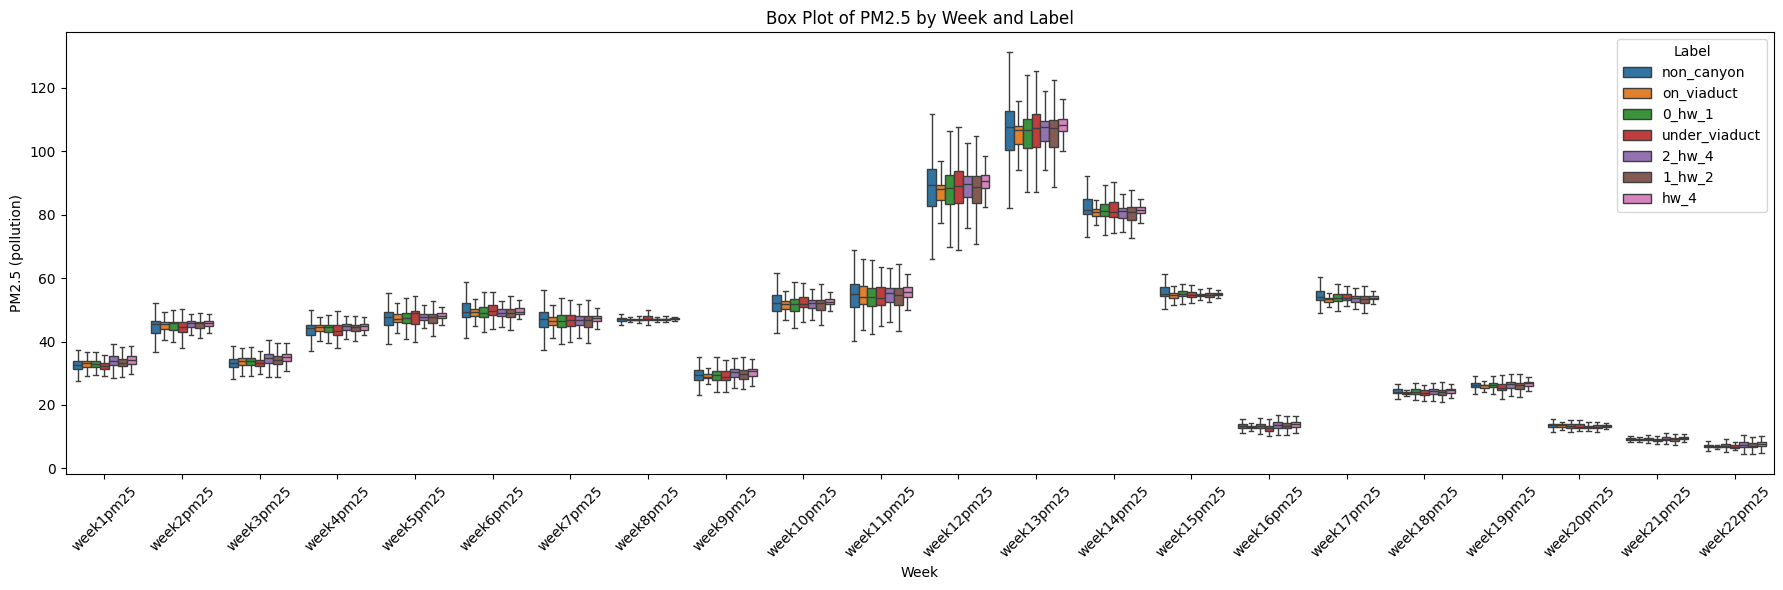

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.boxplot(x='pollutant_week', y='pollution', hue='label', data=df, showfliers=False)
plt.title('Box Plot of PM2.5 by Week and Label')
plt.xlabel('Week')
plt.ylabel('PM2.5 (pollution)')
plt.legend(title='Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/px/2k622df120lblk_sc7mspf840000gn/T/ipykernel_16434/594815267.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


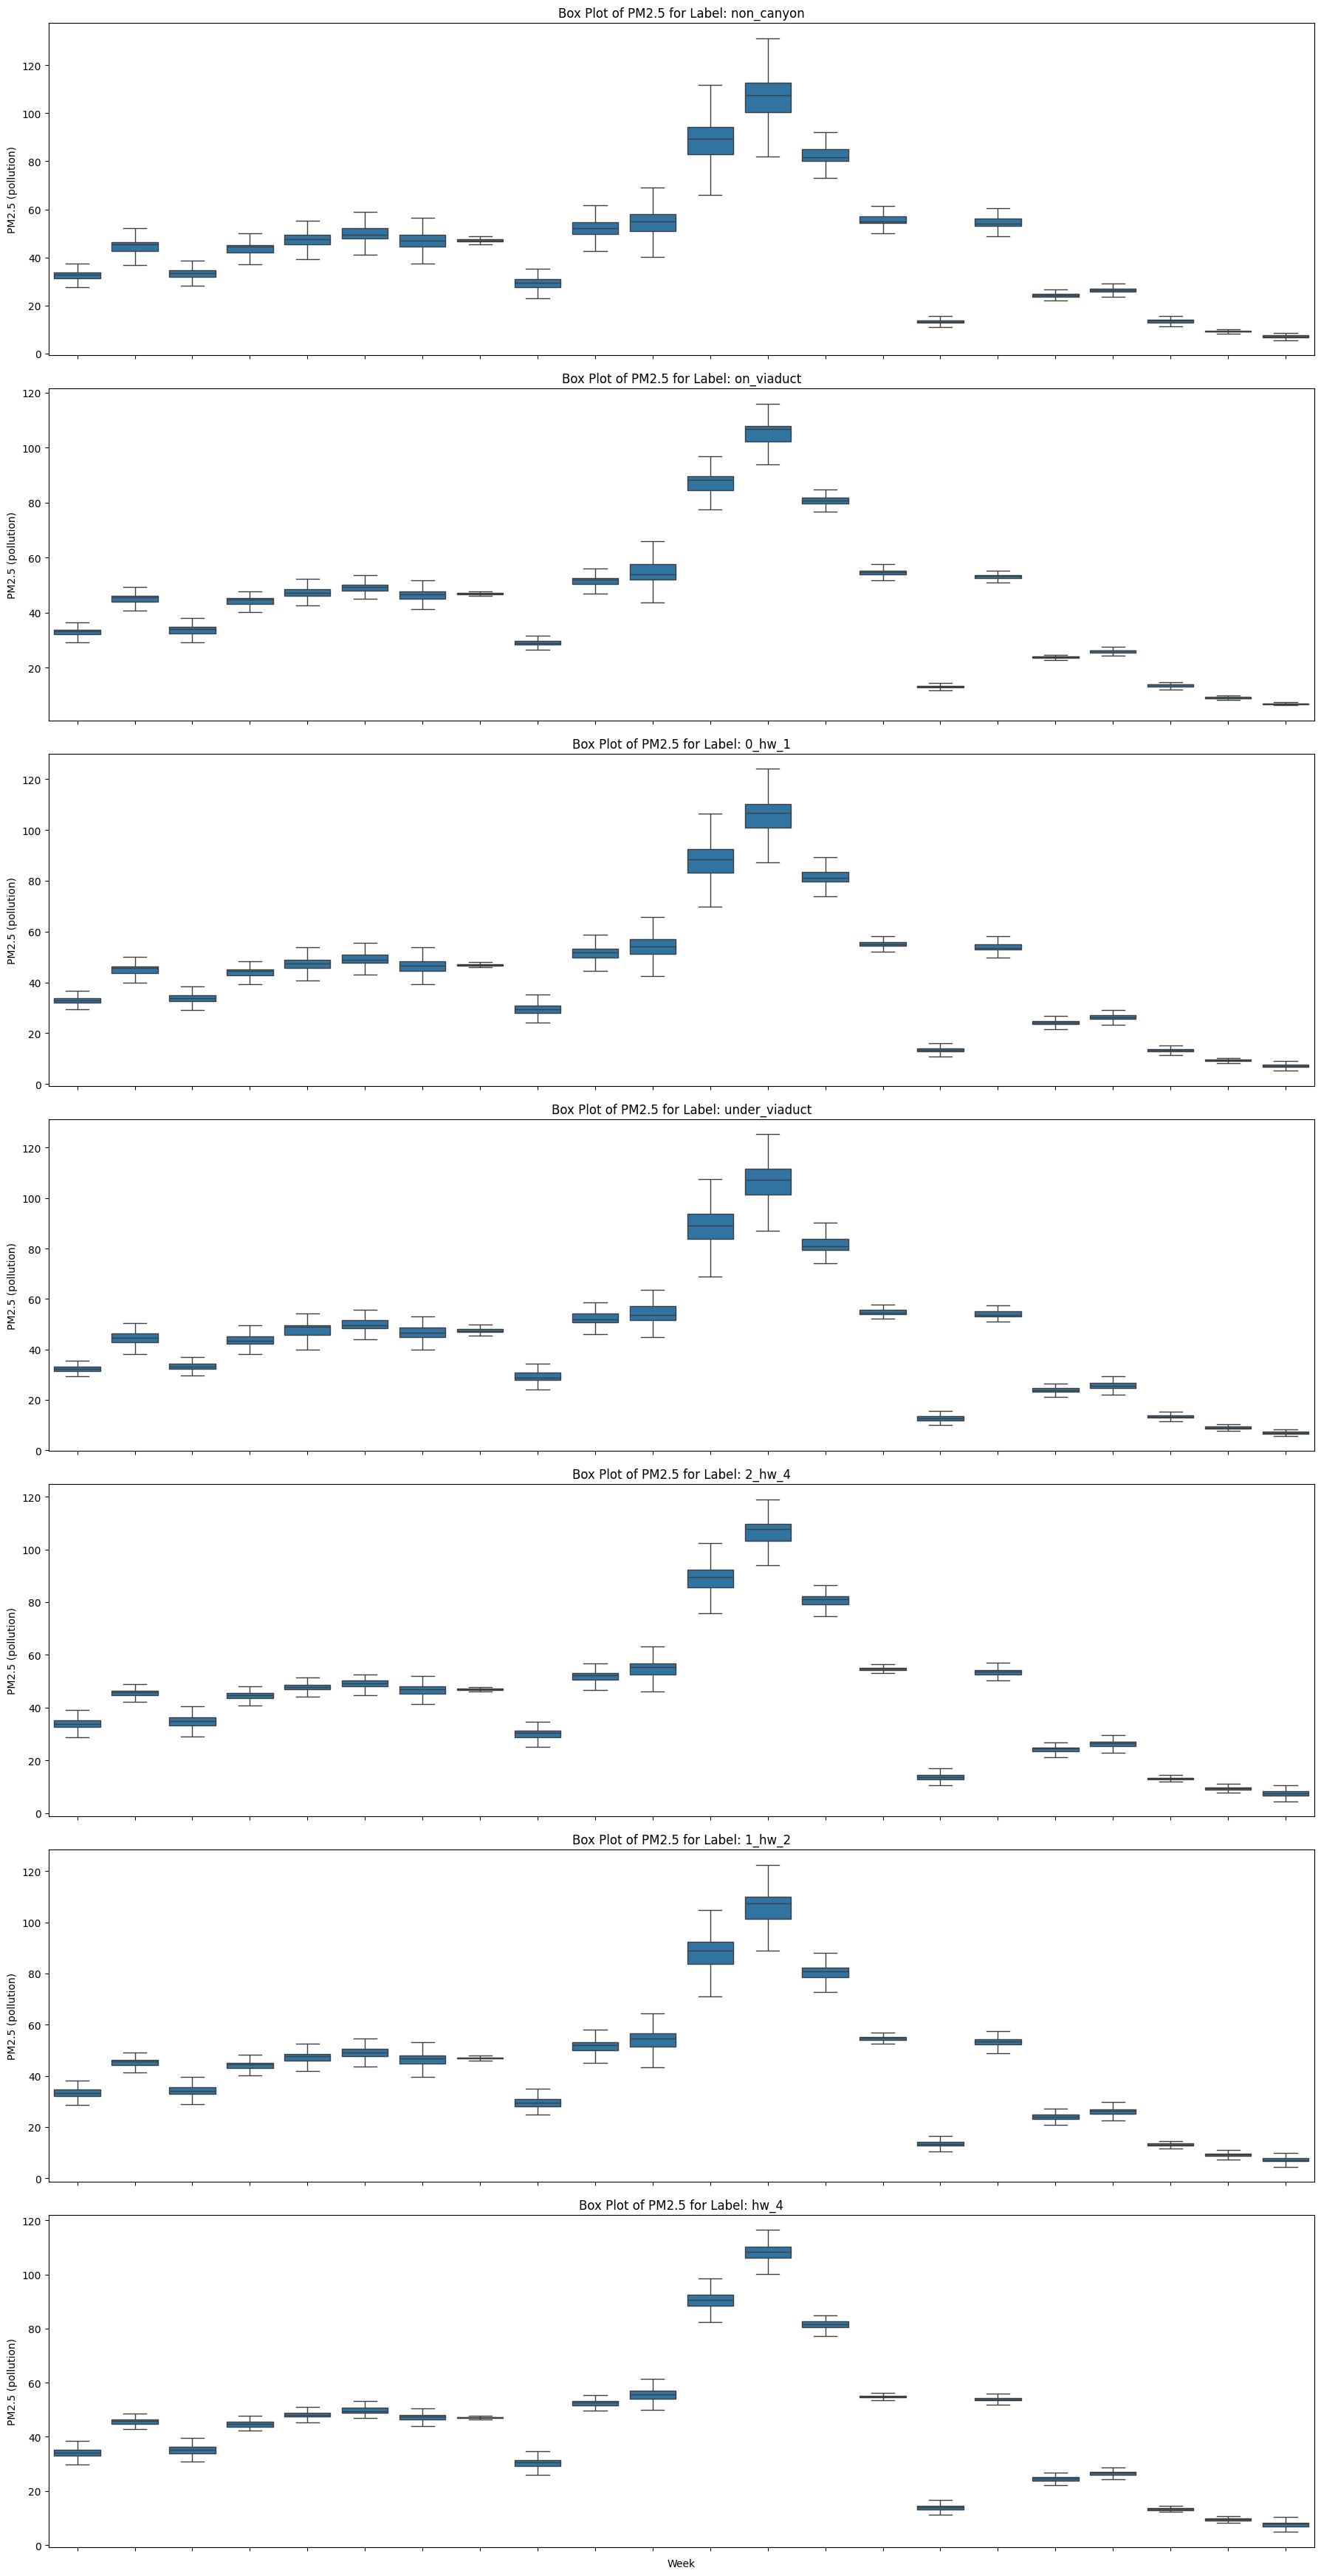

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = df['label'].dropna().unique()
num_labels = len(labels)
fig, axes = plt.subplots(num_labels, 1, figsize=(18, 5*num_labels), sharex=True)

if num_labels == 1:
    axes = [axes]

for ax, label in zip(axes, labels):
    sns.boxplot(x='pollutant_week', y='pollution', data=df[df['label'] == label], showfliers=False, ax=ax)
    ax.set_title(f'Box Plot of PM2.5 for Label: {label}')
    ax.set_xlabel('Week')
    ax.set_ylabel('PM2.5 (pollution)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()